# Machine Learning Test: Question 1

## 1. Data Exploration

### 1.1 Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data_Q1.csv")
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Target,Feature7,Feature8,Feature9,Feature10,Feature11
0,11.490142,2,1,57.877149,2.0,D,0.708477,3.430621,0.901641,0.301351,12.149317
1,9.585207,2,1,36.124585,1.0,D,1.226363,2.424744,0.095880,0.089988,26.588710
2,11.943066,7,0,4.398499,1.0,B,1.031685,6.552963,0.701376,0.388430,9.653393
3,14.569090,5,0,44.441998,2.0,A,0.605034,2.754698,0.251923,0.256948,64.500753
4,9.297540,8,0,59.025887,1.0,B,3.406346,7.587649,2.855271,0.510983,11.990630


This dataset contains 11 features and 1 target.

### 1.2 EDA and data preparation

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature1   10000 non-null  float64
 1   Feature2   10000 non-null  int64  
 2   Feature3   10000 non-null  int64  
 3   Feature4   10000 non-null  float64
 4   Feature5   8958 non-null   float64
 5   Target     9999 non-null   object 
 6   Feature7   9999 non-null   float64
 7   Feature8   10000 non-null  float64
 8   Feature9   9999 non-null   float64
 9   Feature10  9999 non-null   float64
 10  Feature11  10000 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 859.5+ KB


Observations:
- 10000 instances
- Features are numerical data type
- Target is object data type
- Feature 5, 7, 9, 10 and Target contains null

In [3]:
df.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature7,Feature8,Feature9,Feature10,Feature11
count,10000.000000,10000.000000,10000.000000,10000.000000,8958.000000,9999.000000,10000.000000,9999.000000,9999.000000,10000.000000
mean,9.993592,5.017500,0.497000,50.180952,1.658629,1.996710,3.952923,2.047842,0.284333,39.914551
std,3.010387,2.246975,0.500016,29.018885,0.739942,1.957288,2.795548,2.049228,0.158974,28.142414
min,-1.767201,0.000000,0.000000,0.018030,1.000000,0.000055,0.005324,0.000073,0.002205,0.355176
25%,7.982228,3.000000,0.000000,24.897242,1.000000,0.572712,1.919489,0.592887,0.160702,19.498427
50%,9.992215,5.000000,0.000000,50.524351,1.000000,1.403689,3.343896,1.423287,0.263121,33.408223
75%,12.013243,6.000000,1.000000,75.813524,2.000000,2.804660,5.256881,2.832104,0.387674,53.173114
max,21.778713,17.000000,1.000000,99.986720,3.000000,16.802635,31.696281,22.906452,0.890822,239.995853


We can see that Feature 3 is binary (0, 1) and Feature 5 has ordinal relationship (1, 2, 3).

In [4]:
# Check for unique data in Target
df["Target"].unique()

array(['D', 'B', 'A', 'C', nan], dtype=object)

Our target contains D, B, A, and C objects. This is multiclass classification problems. 

In [5]:
df.groupby("Target").size()

Target
A    2513
B    2542
C    2518
D    2426
dtype: int64

Our data is balanced.

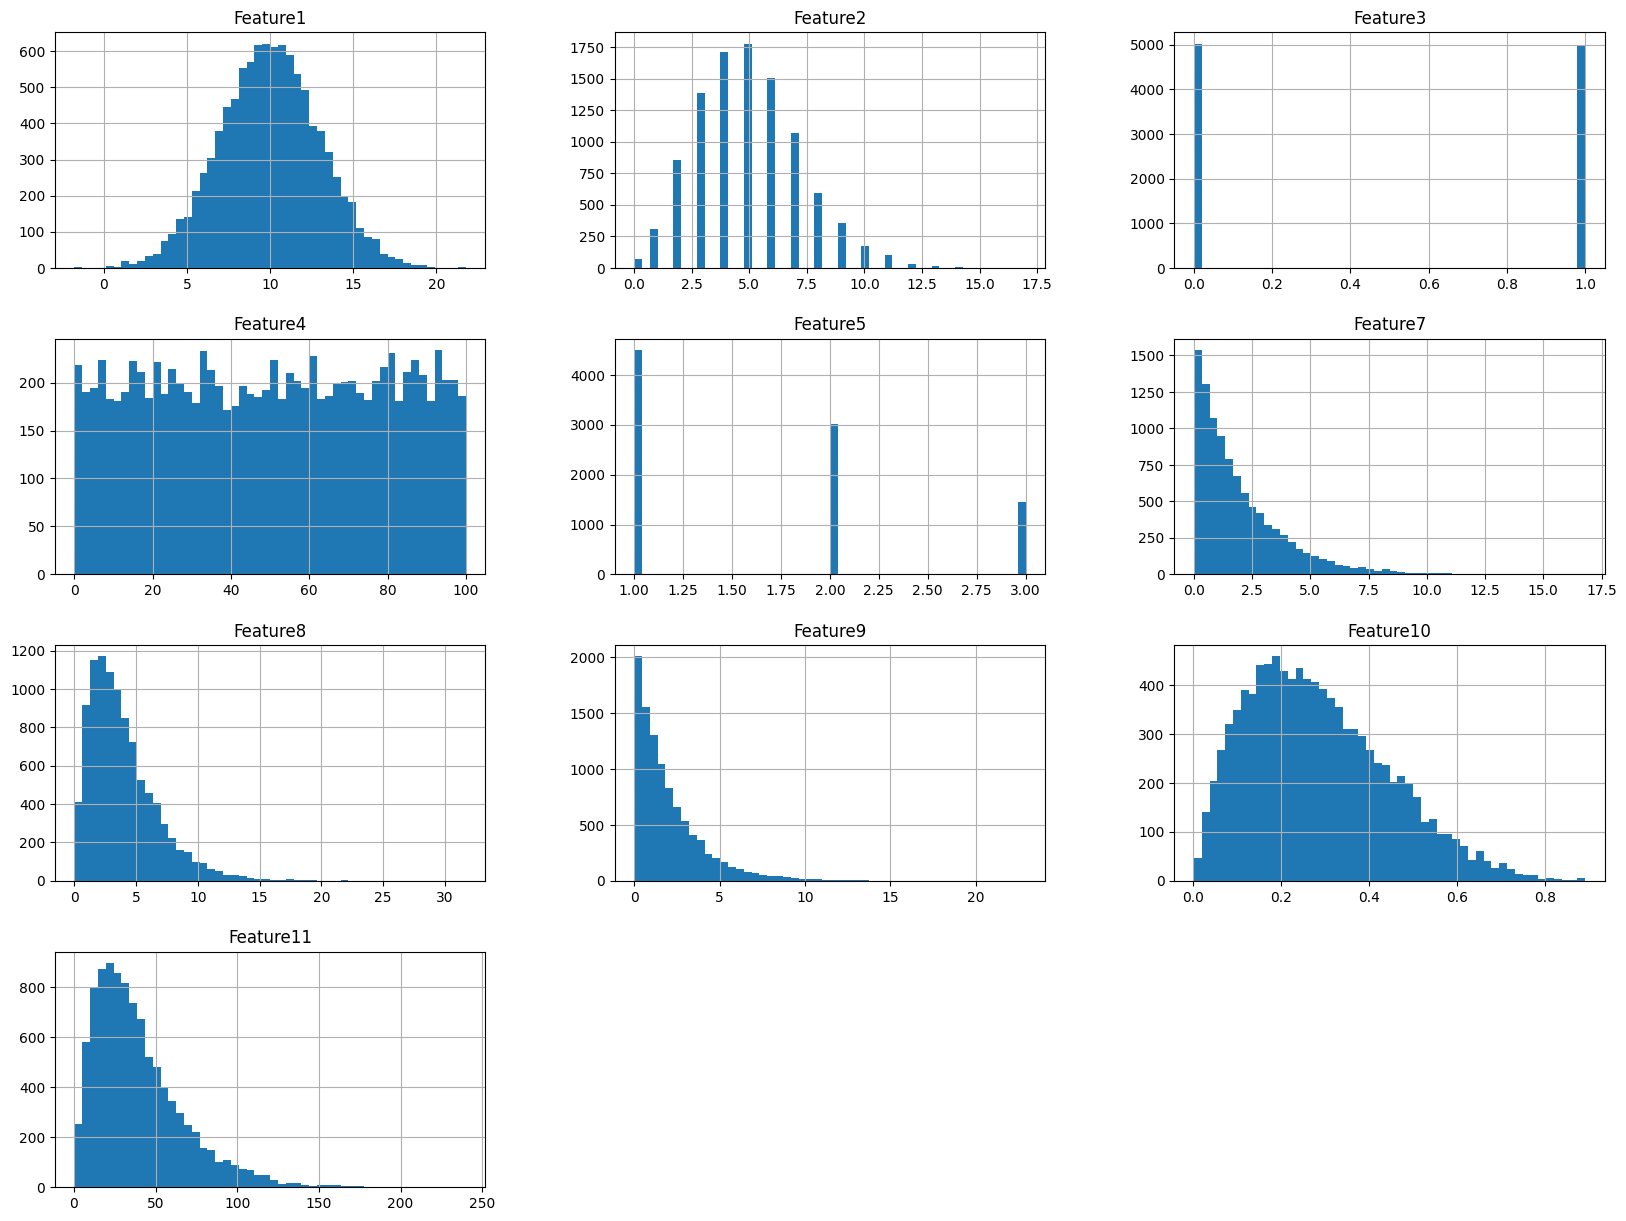

In [6]:
# Plot histogram of every
df.hist(bins=50, figsize=(20,15))
plt.show()

Observations:
- Feature 1 is perfectly clean
- Feature 4 is noise
- Feature 2, 7, 8, 9, 10, 11 are skewed to the right.
- Uneven scaling

## 2. Data Preprocessing

### 2.1 Split features and target

In [7]:
X = df.drop("Target", axis=1)
y = df["Target"]
X.shape, y.shape

((10000, 10), (10000,))

### 2.2 Split training and test dataset

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.3 Build data pipeline

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector

def ratio_pipeline():
    return make_pipeline(
       FunctionTransformer(column_ratio, feature_names_out=ratio_name),
       StandardScaler()
    )

def column_ratio(X):
    return X[:, 0] / X[:, 1]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def sum_pipeline():
    return make_pipeline(
       SimpleImputer(strategy="mean"),
       FunctionTransformer(column_sum, feature_names_out=sum_name),
       StandardScaler()
    )

def column_sum(X):
    return X[:, 0] + X[:, 1] + X[:, 2]

def sum_name(function_transformer, feature_names_in):
    return ["sum"]

def mul_pipeline():
    return make_pipeline(
       SimpleImputer(strategy="mean"),
       FunctionTransformer(column_mul, feature_names_out=mul_name),
       StandardScaler()
    )

def column_mul(X):
    return X[:, 0] * X[:, 1]

def mul_name(function_transformer, feature_names_in):
    return ["mul"]

def log_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="mean"),
        FunctionTransformer(np.log, feature_names_out="one-to-one"),
        StandardScaler()
    )

def cat_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder()
    )

def default_num_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="mean"),
        StandardScaler()
    )

preprocessing = ColumnTransformer([
    ("ratio", ratio_pipeline(), ["Feature1", "Feature2"]),
    ("sum", sum_pipeline(), ["Feature3", "Feature4", "Feature5"]),
    ("mul", mul_pipeline(), ["Feature7", "Feature8"]),
    ("log", log_pipeline(), ["Feature2", "Feature7", "Feature8", "Feature9", "Feature10", "Feature11"]),
    ("cat", cat_pipeline(), ["Target"])
], remainder=default_num_pipeline())